In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc


%matplotlib inline

In [3]:
mort_data = pd.read_csv('/Users/wickedbear/Coding/Projects/Mortgage_Default/Data_and_Cleaning/mortgage_df.csv')

In [4]:
mort_data

,id,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,ratio_paid
0,1,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,0,1,0.082146
1,2,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,1,2,0.012814
2,3,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1,2,0.076828
3,4,61031.10,33.911009,10.500,226.29,2.899137,4.7,0,0,1,0,63750.0,587,81.8,10.500,97.99,0,0,0,0.042649
4,5,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,1,2,0.009563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46310,49996,67229.76,65.651349,3.250,161.13,1.081049,8.0,0,0,0,1,82000.0,688,71.9,1.625,179.45,0,0,0,0.180125
46311,49997,347558.19,87.595352,2.750,161.13,1.081049,8.0,0,0,0,0,331417.0,692,75.0,1.250,179.45,0,0,0,-0.048704
46312,49998,154505.10,91.081651,3.000,161.13,1.081049,8.0,0,0,0,0,166250.0,750,88.0,2.250,179.45,0,0,0,0.070646
46313,49999,270027.82,52.300726,2.790,161.13,1.081049,8.0,1,0,0,0,345000.0,779,60.0,1.750,179.45,0,0,0,0.217311


In [5]:
mort_data.status_time.value_counts()

2    23527
1    14531
0     8257
Name: status_time, dtype: int64

In [6]:
mort_data = mort_data[mort_data.status_time != 0]
mort_data

,id,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,ratio_paid
0,1,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,0,1,0.082146
1,2,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,1,2,0.012814
2,3,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1,2,0.076828
4,5,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,1,2,0.009563
5,6,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42,1,0,1,0.013876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46281,49966,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29,1,0,1,0.093329
46284,49970,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29,0,1,2,0.099257
46286,49972,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29,1,0,1,0.078198
46297,49983,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77,0,1,2,0.139129


In [7]:
mort_data.status_time.value_counts()

2    23527
1    14531
Name: status_time, dtype: int64

In [8]:
rep_dict = {2:1, 1:0}

In [9]:
mort_data.status_time.replace(rep_dict, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [10]:
mort_data

,id,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,ratio_paid
0,1,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,0,0,0.082146
1,2,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,1,1,0.012814
2,3,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1,1,0.076828
4,5,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,1,1,0.009563
5,6,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42,1,0,0,0.013876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46281,49966,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29,1,0,0,0.093329
46284,49970,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29,0,1,1,0.099257
46286,49972,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29,1,0,0,0.078198
46297,49983,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77,0,1,1,0.139129


In [11]:
mort_data.status_time.value_counts()

1    23527
0    14531
Name: status_time, dtype: int64

In [12]:
mort_data

,id,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,ratio_paid
0,1,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,0,0,0.082146
1,2,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,1,1,0.012814
2,3,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1,1,0.076828
4,5,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,1,1,0.009563
5,6,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42,1,0,0,0.013876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46281,49966,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29,1,0,0,0.093329
46284,49970,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29,0,1,1,0.099257
46286,49972,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29,1,0,0,0.078198
46297,49983,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77,0,1,1,0.139129


In [221]:
mort_data.to_csv('revised_mort_data.csv')

In [13]:
y = mort_data['status_time']
X = mort_data.drop(columns=['status_time'], axis=1)

In [14]:
X

,id,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,ratio_paid
0,1,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,0,0.082146
1,2,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,1,0.012814
2,3,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1,0.076828
4,5,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,1,0.009563
5,6,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42,1,0,0.013876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46281,49966,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29,1,0,0.093329
46284,49970,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29,0,1,0.099257
46286,49972,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29,1,0,0.078198
46297,49983,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77,0,1,0.139129


In [15]:
X = X.drop(columns=['id'], axis=1)

In [16]:
X

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,ratio_paid
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,0,0.082146
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,1,0.012814
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1,0.076828
4,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,1,0.009563
5,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42,1,0,0.013876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46281,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29,1,0,0.093329
46284,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29,0,1,0.099257
46286,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29,1,0,0.078198
46297,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77,0,1,0.139129


need to drop ratio column (in decimal form), standardize the other columns, then add the ratio column back

In [17]:
ratio_paid_df = pd.DataFrame(X.ratio_paid)

In [18]:
ratio_paid_df

,ratio_paid
0,0.082146
1,0.012814
2,0.076828
4,0.009563
5,0.013876
...,...
46281,0.093329
46284,0.099257
46286,0.078198
46297,0.139129


In [19]:
X = X.drop(columns='ratio_paid')

In [20]:
X

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03,1,0
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91,0,1
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58,0,1
4,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91,0,1
5,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46281,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29,1,0
46284,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29,0,1
46286,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29,1,0
46297,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77,0,1


In [21]:
X = X.drop(columns='default_time')
X = X.drop(columns='payoff_time')
X

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,41303.42,24.498336,9.200,226.29,2.899137,4.7,0,0,1,0,45000.0,715,69.4,9.200,87.03
1,105826.38,65.231343,7.680,226.29,2.899137,4.7,0,0,1,0,107200.0,558,80.0,7.680,186.91
2,44866.18,30.551659,10.500,226.29,2.899137,4.7,0,0,1,0,48600.0,680,83.6,8.750,89.58
4,52295.07,65.446133,9.155,226.29,2.899137,4.7,0,0,1,0,52800.0,527,80.0,9.155,186.91
5,209058.33,66.733446,6.580,226.29,2.899137,4.7,0,0,1,0,212000.0,670,80.0,6.580,191.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46281,93568.44,101.865855,6.875,161.13,1.081049,8.0,0,0,1,1,103200.0,726,80.0,6.875,226.29
46284,78004.35,101.199851,7.500,161.13,1.081049,8.0,0,0,1,1,86600.0,672,80.0,7.500,226.29
46286,180673.24,103.306966,7.500,161.13,1.081049,8.0,0,0,1,0,196000.0,708,79.8,7.500,226.29
46297,199721.99,62.251083,6.500,161.13,1.081049,8.0,0,0,0,0,232000.0,665,74.8,6.500,155.77


In [22]:
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X.head()

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,0.005153,0.121653,0.224658,1.0,0.759318,0.157895,0.0,0.0,1.0,0.0,0.005625,0.725806,0.114608,0.511111,0.075176
1,0.013254,0.324722,0.183014,1.0,0.759318,0.157895,0.0,0.0,1.0,0.0,0.013400,0.364055,0.177553,0.426667,0.738478
2,0.005600,0.151831,0.260274,1.0,0.759318,0.157895,0.0,0.0,1.0,0.0,0.006075,0.645161,0.198931,0.486111,0.092111
4,0.006533,0.325792,0.223425,1.0,0.759318,0.157895,0.0,0.0,1.0,0.0,0.006600,0.292627,0.177553,0.508611,0.738478
5,0.026215,0.332210,0.152877,1.0,0.759318,0.157895,0.0,0.0,1.0,0.0,0.026500,0.622120,0.177553,0.365556,0.768429


In [23]:
X.join(ratio_paid_df, how='inner')

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,ratio_paid
0,0.005153,0.121653,0.224658,1.000000,0.759318,0.157895,0.0,0.0,1.0,0.0,0.005625,0.725806,0.114608,0.511111,0.075176,0.082146
1,0.013254,0.324722,0.183014,1.000000,0.759318,0.157895,0.0,0.0,1.0,0.0,0.013400,0.364055,0.177553,0.426667,0.738478,0.012814
2,0.005600,0.151831,0.260274,1.000000,0.759318,0.157895,0.0,0.0,1.0,0.0,0.006075,0.645161,0.198931,0.486111,0.092111,0.076828
4,0.006533,0.325792,0.223425,1.000000,0.759318,0.157895,0.0,0.0,1.0,0.0,0.006600,0.292627,0.177553,0.508611,0.738478,0.009563
5,0.026215,0.332210,0.152877,1.000000,0.759318,0.157895,0.0,0.0,1.0,0.0,0.026500,0.622120,0.177553,0.365556,0.768429,0.013876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46281,0.011715,0.507357,0.160959,0.449941,0.563386,0.736842,0.0,0.0,1.0,1.0,0.012900,0.751152,0.177553,0.381944,1.000000,0.093329
46284,0.009761,0.504037,0.178082,0.449941,0.563386,0.736842,0.0,0.0,1.0,1.0,0.010825,0.626728,0.177553,0.416667,1.000000,0.099257
46286,0.022651,0.514542,0.178082,0.449941,0.563386,0.736842,0.0,0.0,1.0,0.0,0.024500,0.709677,0.176366,0.416667,1.000000,0.078198
46297,0.025042,0.309864,0.150685,0.449941,0.563386,0.736842,0.0,0.0,0.0,0.0,0.029000,0.610599,0.146675,0.361111,0.531678,0.139129


In [24]:
for_hist = list(X.columns)

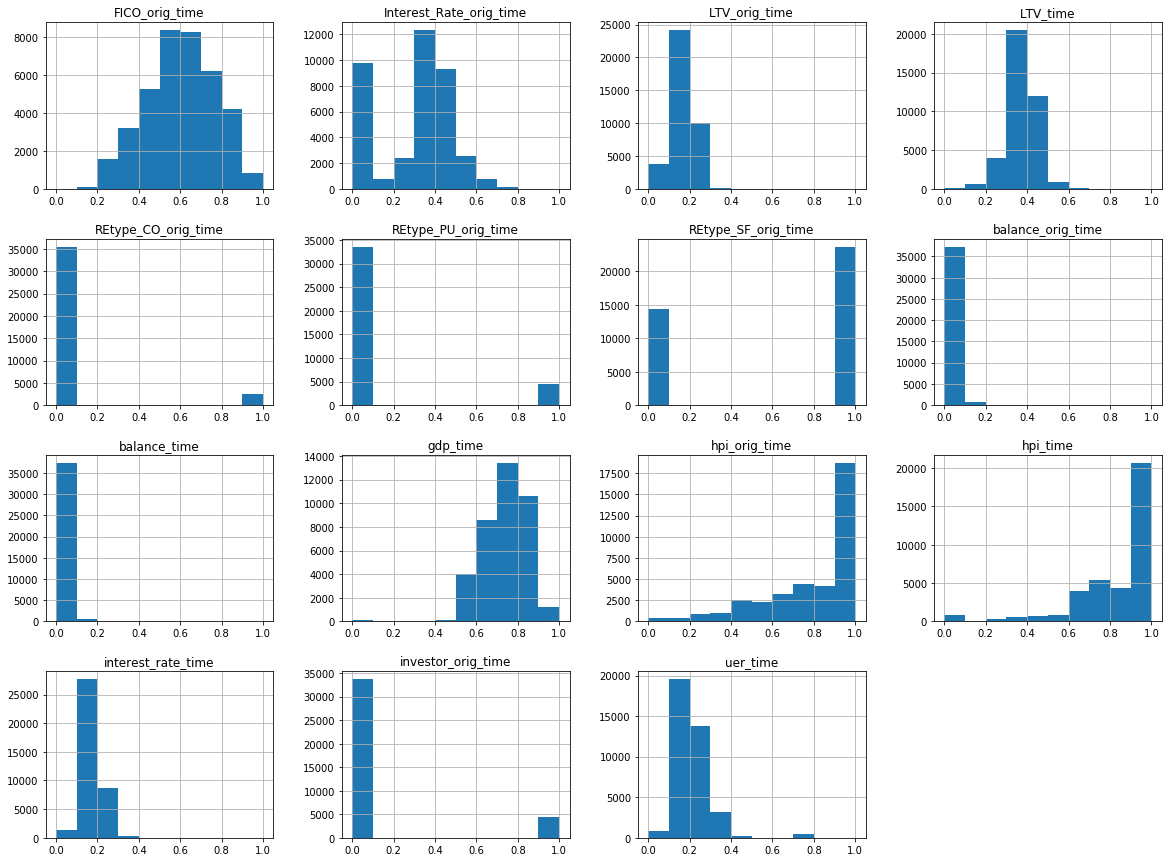

In [25]:
hist = X[for_hist].hist(figsize=[20,15])

In [26]:
X.corr()

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
balance_time,1.000000,0.000004,-0.281971,0.121257,-0.098183,-0.044499,-0.007665,0.097362,-0.048760,-0.118066,0.996287,0.320382,-0.194417,-0.089131,0.199319
LTV_time,0.000004,1.000000,0.138000,0.044376,-0.385634,-0.083424,0.034761,0.032355,-0.014338,-0.010832,-0.015515,-0.001291,0.637547,0.038962,0.526782
interest_rate_time,-0.281971,0.138000,1.000000,-0.149439,-0.166542,-0.205196,-0.050282,-0.099302,0.047813,0.034145,-0.284928,-0.450306,0.191441,0.239418,-0.088708
hpi_time,0.121257,0.044376,-0.149439,1.000000,-0.175832,-0.422409,0.041854,0.048993,-0.085026,0.018459,0.118538,0.128813,0.007604,-0.019600,0.716149
gdp_time,-0.098183,-0.385634,-0.166542,-0.175832,1.000000,0.117291,-0.017306,-0.005919,-0.019047,-0.007104,-0.097243,0.005338,-0.004511,-0.082730,-0.481889
uer_time,-0.044499,-0.083424,-0.205196,-0.422409,0.117291,1.000000,-0.025684,-0.024283,0.005347,-0.008739,-0.038149,0.011503,0.021390,-0.186236,-0.373782
REtype_CO_orig_time,-0.007665,0.034761,-0.050282,0.041854,-0.017306,-0.025684,1.000000,-0.097048,-0.341938,0.021080,-0.008362,0.092157,0.010199,-0.026554,0.052222
REtype_PU_orig_time,0.097362,0.032355,-0.099302,0.048993,-0.005919,-0.024283,-0.097048,1.000000,-0.469377,-0.018582,0.095988,0.123878,-0.007972,-0.026650,0.067675
REtype_SF_orig_time,-0.048760,-0.014338,0.047813,-0.085026,-0.019047,0.005347,-0.341938,-0.469377,1.000000,-0.101491,-0.047371,-0.132256,0.006523,-0.015224,-0.073551
investor_orig_time,-0.118066,-0.010832,0.034145,0.018459,-0.007104,-0.008739,0.021080,-0.018582,-0.101491,1.000000,-0.118981,0.168743,-0.068083,0.095314,0.044522


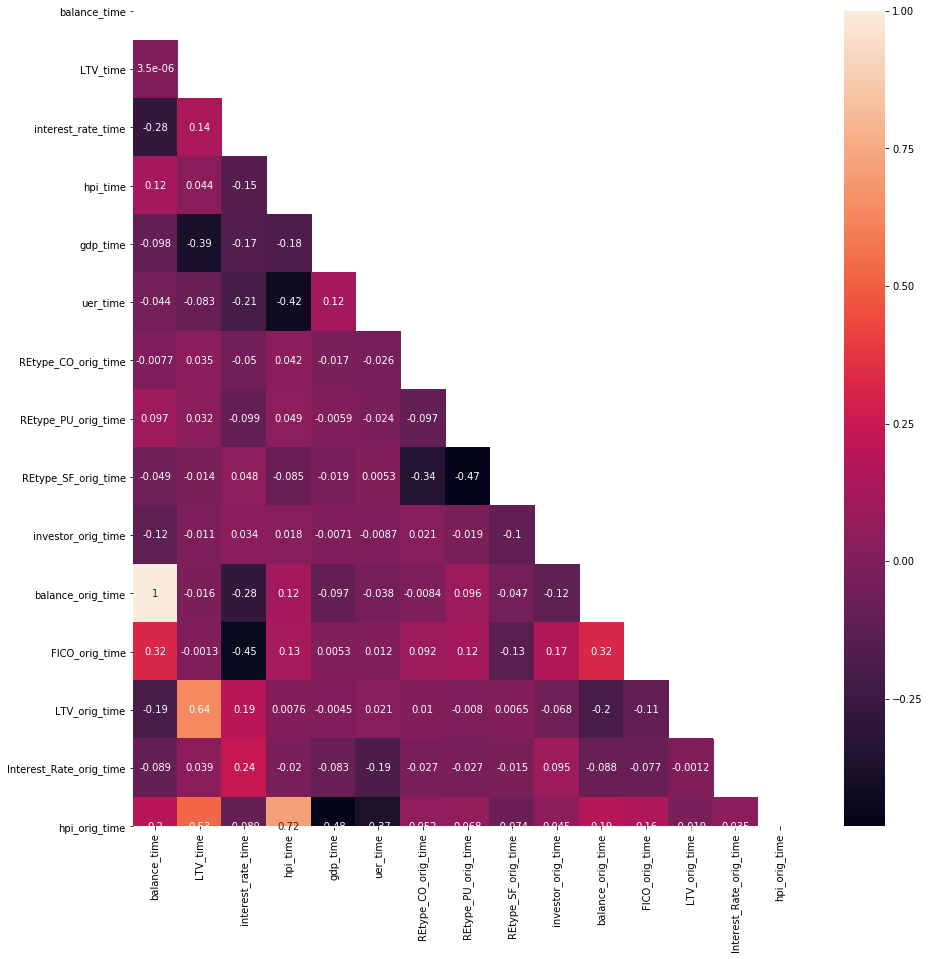

In [27]:
fig, ax = plt.subplots(figsize=(15,15))
mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(X.corr(), mask=mask, annot=True);

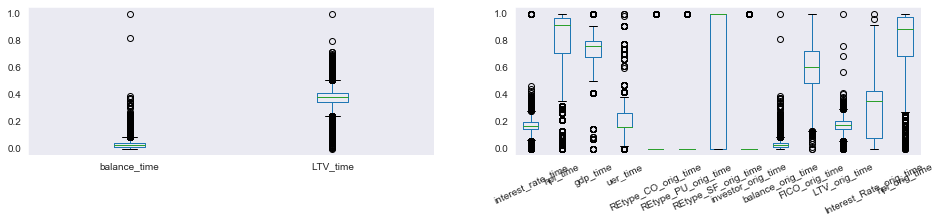

In [28]:
# looking to see if there are significant outliers
sns.set_style("darkgrid")

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1 = X.iloc[:,0:2].boxplot(grid=False, fontsize=10, ax=ax1)
ax2 = X.iloc[:,2:].boxplot(grid=False, rot=25, fontsize=10, ax=ax2)

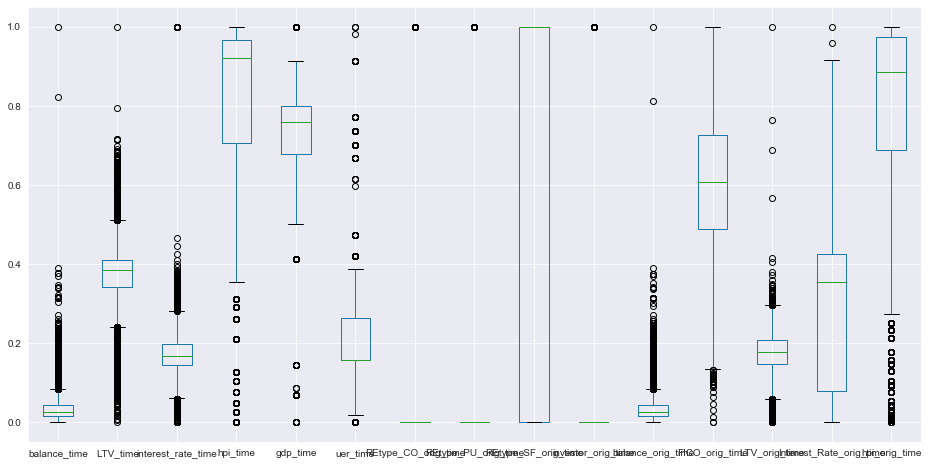

In [29]:
X.plot(kind='box',figsize=(16,8))

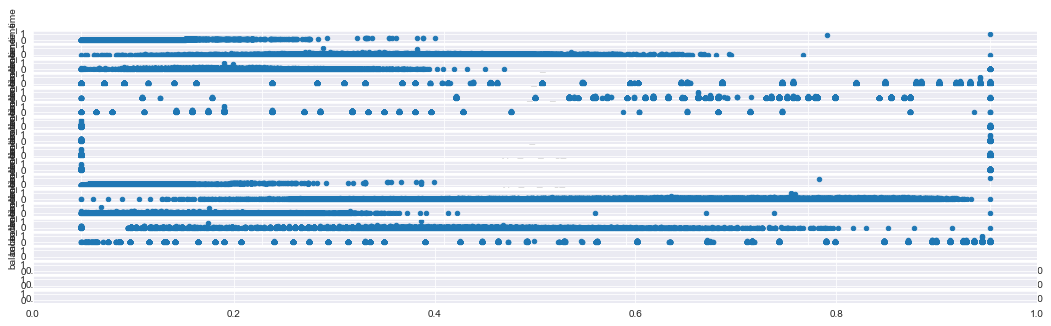

In [30]:
fig, axs = plt.subplots(19, 1, sharey=True, figsize=(18, 5))

for i, j in enumerate(for_hist):
    X.plot(kind='scatter', x=j, y='balance_time', ax=axs[i])

plt.show()

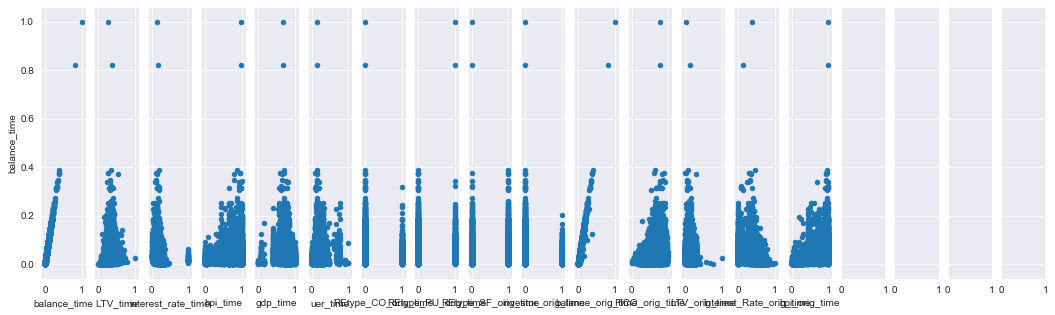

In [31]:
fig, axs = plt.subplots(1, 19, sharey=True, figsize=(18, 5))

for i, j in enumerate(for_hist):
    X.plot(kind='scatter', x=j, y='balance_time', ax=axs[i])

plt.show()

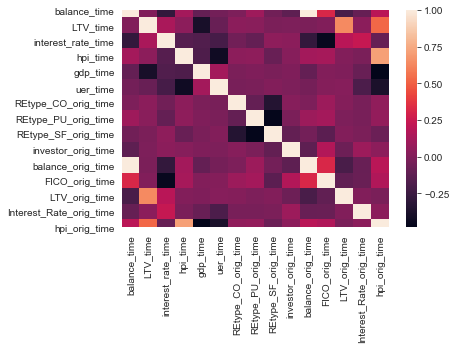

In [32]:
heat_map = sns.heatmap(X.corr())

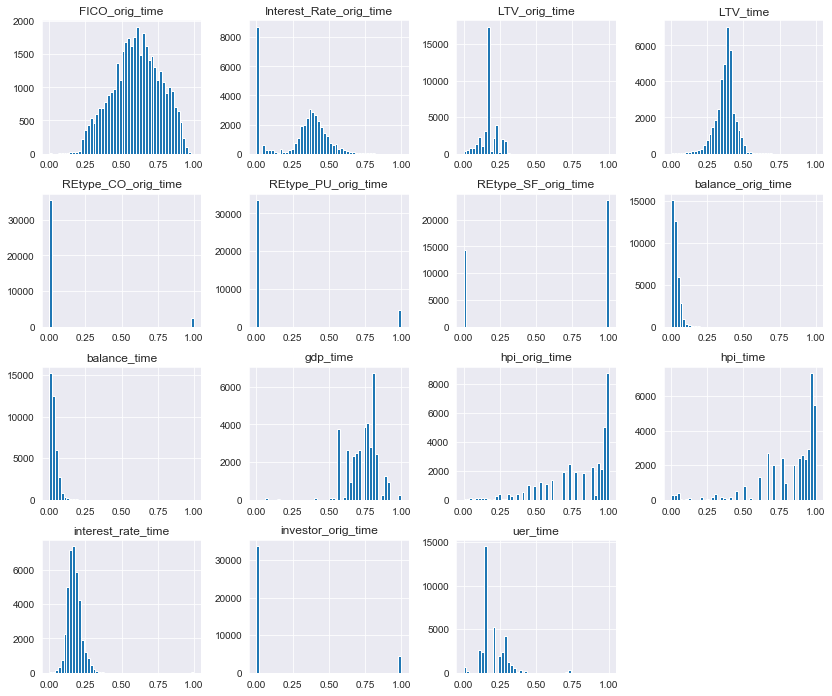

In [33]:
X[for_hist].hist(bins=50, figsize=(14,12));

In [34]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [37]:
y_hat_test

array([1, 0, 1, ..., 1, 1, 0])

In [38]:
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0    20746
1     7797
Name: status_time, dtype: int64
------------------------------------
0    0.726833
1    0.273167
Name: status_time, dtype: float64


In [39]:
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))


0    6863
1    2652
Name: status_time, dtype: int64
------------------------------------
0    0.721282
1    0.278718
Name: status_time, dtype: float64


Test AUC: 0.6956452376382933


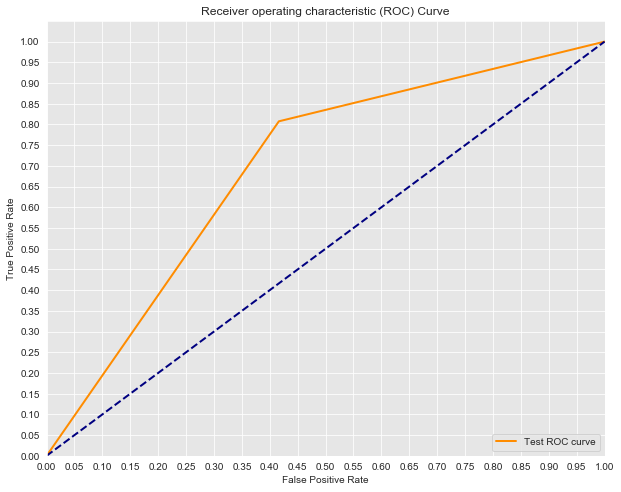

In [40]:
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)

print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix

test_predictions = (y_hat_test >= 0.5).astype('int')

cnf_matrix = confusion_matrix(test_predictions, y_test)

print(cnf_matrix)

[[2141 1125]
 [1527 4722]]


In [42]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='newton-cg', )
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 0.7761556206192884
Test AUC: 0.7643280609374006


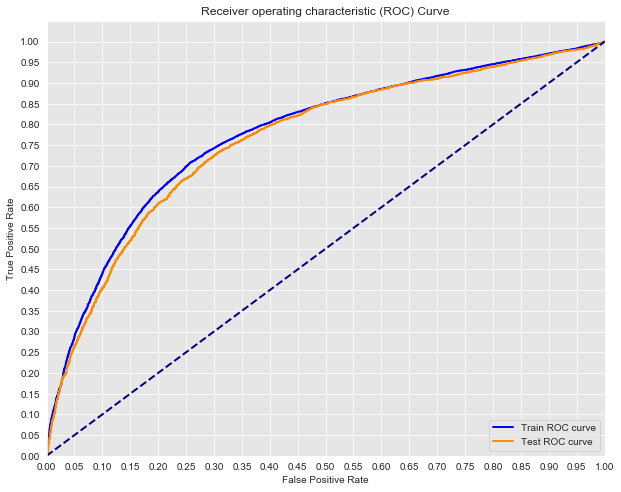

In [43]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [44]:
logregi = LogisticRegression(fit_intercept=True, C=1e16, solver='liblinear')
logregi.fit(X_train, y_train)

LogisticRegression(C=1e+16, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Custom Model Test AUC: 0.6956452376382933
Custome Model Train AUC: 0.7011069686090399
Scikit-learn Model 1 Test AUC: 0.7643280609374006
Scikit-learn Model 1 Train AUC: 0.7761556206192884
Scikit-learn Model 2 with intercept Test AUC: 0.7644530213277545
Scikit-learn Model 2 with intercept Train AUC: 0.7754866086174874


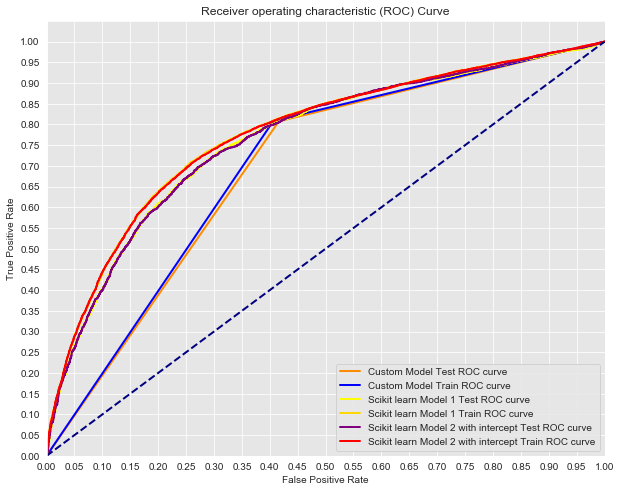

In [45]:
# Initial model plots
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)


print('Custom Model Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Custome Model Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Custom Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Custom Model Train ROC curve')


# Second model plots
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 1 Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 1 Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='yellow',
         lw=lw, label='Scikit learn Model 1 Test ROC curve')
plt.plot(train_fpr, train_tpr, color='gold',
         lw=lw, label='Scikit learn Model 1 Train ROC curve')


# Third model plots
y_test_score = logregi.decision_function(X_test)
y_train_score = logregi.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 2 with intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 2 with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='purple',
         lw=lw, label='Scikit learn Model 2 with intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='red',
         lw=lw, label='Scikit learn Model 2 with intercept Train ROC curve')

# Formatting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

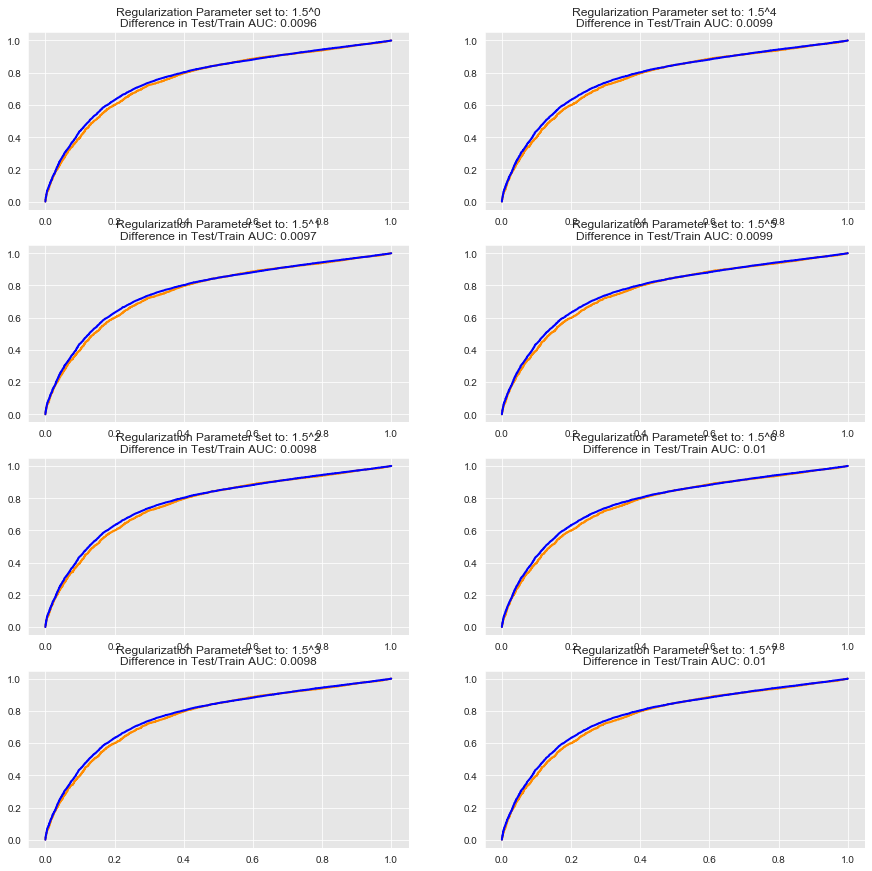

In [46]:
fig, axes = plt.subplots(4,2, figsize=(15, 15))
for n in range(8):
    i = n%4
    j = n//4
    ax = axes[i, j]
    # Fit a model
    logreg = LogisticRegression(fit_intercept=True, C=1.5**(n), solver='liblinear')
    logreg.fit(X_train, y_train)
    
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    
    test_auc = auc(test_fpr, test_tpr)
    train_auc = auc(train_fpr, train_tpr)
    auc_diff = round(train_auc - test_auc, 4)

#     print('Test AUC with C=1.5^{}: {}'.format(n*2, auc(test_fpr, test_tpr)))
#     print('Train AUCwith C=1.5^{}: {}'.format(n*2, auc(train_fpr, train_tpr)))
    # Add the plot
    ax.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
    ax.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    
    ax.set_title('Regularization Parameter set to: 1.5^{}\nDifference in Test/Train AUC: {}'.format(n, auc_diff))

In [47]:
X

,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,0.005153,0.121653,0.224658,1.000000,0.759318,0.157895,0.0,0.0,1.0,0.0,0.005625,0.725806,0.114608,0.511111,0.075176
1,0.013254,0.324722,0.183014,1.000000,0.759318,0.157895,0.0,0.0,1.0,0.0,0.013400,0.364055,0.177553,0.426667,0.738478
2,0.005600,0.151831,0.260274,1.000000,0.759318,0.157895,0.0,0.0,1.0,0.0,0.006075,0.645161,0.198931,0.486111,0.092111
4,0.006533,0.325792,0.223425,1.000000,0.759318,0.157895,0.0,0.0,1.0,0.0,0.006600,0.292627,0.177553,0.508611,0.738478
5,0.026215,0.332210,0.152877,1.000000,0.759318,0.157895,0.0,0.0,1.0,0.0,0.026500,0.622120,0.177553,0.365556,0.768429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46281,0.011715,0.507357,0.160959,0.449941,0.563386,0.736842,0.0,0.0,1.0,1.0,0.012900,0.751152,0.177553,0.381944,1.000000
46284,0.009761,0.504037,0.178082,0.449941,0.563386,0.736842,0.0,0.0,1.0,1.0,0.010825,0.626728,0.177553,0.416667,1.000000
46286,0.022651,0.514542,0.178082,0.449941,0.563386,0.736842,0.0,0.0,1.0,0.0,0.024500,0.709677,0.176366,0.416667,1.000000
46297,0.025042,0.309864,0.150685,0.449941,0.563386,0.736842,0.0,0.0,0.0,0.0,0.029000,0.610599,0.146675,0.361111,0.531678


In [48]:
y

0        0
1        1
2        1
4        1
5        0
        ..
46281    0
46284    1
46286    0
46297    1
46298    1
Name: status_time, Length: 38058, dtype: int64

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd






# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

# Preview model params
print(model_log) 

# Predict
y_hat_test = logreg.predict(X_test)

print("")
# Data preview
X.head()

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)



,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,uer_time,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time
0,0.005153,0.121653,0.224658,1.0,0.759318,0.157895,0.0,0.0,1.0,0.0,0.005625,0.725806,0.114608,0.511111,0.075176
1,0.013254,0.324722,0.183014,1.0,0.759318,0.157895,0.0,0.0,1.0,0.0,0.013400,0.364055,0.177553,0.426667,0.738478
2,0.005600,0.151831,0.260274,1.0,0.759318,0.157895,0.0,0.0,1.0,0.0,0.006075,0.645161,0.198931,0.486111,0.092111
4,0.006533,0.325792,0.223425,1.0,0.759318,0.157895,0.0,0.0,1.0,0.0,0.006600,0.292627,0.177553,0.508611,0.738478
5,0.026215,0.332210,0.152877,1.0,0.759318,0.157895,0.0,0.0,1.0,0.0,0.026500,0.622120,0.177553,0.365556,0.768429


In [50]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

{'TP': 4722, 'TN': 2141, 'FP': 1527, 'FN': 1125}

In [51]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[2141 1527]
 [1125 4722]]


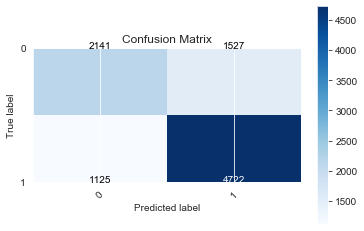

In [52]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [54]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Pseudocode/Outline:
    # Print the confusion matrix (optional)
    # Create the basic matrix
    # Add title and axis labels
    # Add appropriate axis scales
    # Add labels to each cell
    # Add a legend
    
    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

Normalized confusion matrix
[[0.58369684 0.41630316]
 [0.19240636 0.80759364]]


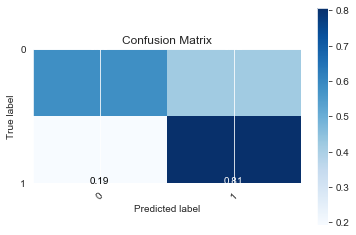

In [56]:
# Plot a normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')